In [1]:
import numpy as np
import pandas as pd

# 2021 NOAA Storm Data Exploration & Visualiztion

This notebook explores the 2021 Storm Events Database published by the National Centers for Environmental Information's National Oceanic and Atmospheric Administration (NOAA). Recorded is data regarding the location, fatalities, and details of storms and other significant weather phenomena. 

The data used comes from the [NOAA's Storm Events Database](https://www.ncdc.noaa.gov/stormevents/ftp.jsp). The full 2021 year CSV files for bulk download are located [here](https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/). (At the time of use, files were last modified 2022-10-18 16:07) More information about the data can be found on the [FAQ page](https://www.ncdc.noaa.gov/stormevents/faq.jsp) and information regarding the fields/columns can be found [here](https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf).

<div>
<img src="noaa_emblem_logo-2022.png" width="300"/>
</div>

## Table of Contents
1. [Data Loading](#loading)
2. [Data Cleaning](#cleaning)
3. [Data Exploration & Transformation](#explore)
[<ul>Details Data</ul>](#details)
[<ul>Fatalities Data</ul>](#fatalities)
[<ul>Locations Data</ul>](#locations)
4. [Data Visualization](#viz)

#### Note: 
- Some visualiztions do not display in GitHub, so I added screenshots in the repository
- Hyperlinks in the Jupyter Notebook will not work in GitHub

## Data Loading<a name="loading"></a>

In [2]:
# downloaded on 11/5/2022

details = pd.read_csv('StormEvents_details-ftp_v1.0_d2021_c20221018.csv.gz')
fatalities = pd.read_csv('StormEvents_fatalities-ftp_v1.0_d2021_c20221018.csv.gz')
locations = pd.read_csv('StormEvents_locations-ftp_v1.0_d2021_c20221018.csv.gz')

## Data Cleaning<a name="cleaning"></a>

Used a `for` loop to change the column names in each DataFrame to lowercase and snake case. In initial review, appears all column names were already snake case, but renamed just to be safe.

In [3]:
df_list = [locations, fatalities, details]

for df in df_list:
    df.rename(columns=lambda col: col.replace(' ', '_').lower(), inplace=True)

Utilized `.head()`, `.shape`, `.info()`, and `.describe()` to familiarize myself with the data. Additional information about specific fields and columns can be found [here](https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf).

In [4]:
details.head()
details.info()
details.describe()
details.shape #61110 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61110 entries, 0 to 61109
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   begin_yearmonth     61110 non-null  int64  
 1   begin_day           61110 non-null  int64  
 2   begin_time          61110 non-null  int64  
 3   end_yearmonth       61110 non-null  int64  
 4   end_day             61110 non-null  int64  
 5   end_time            61110 non-null  int64  
 6   episode_id          61110 non-null  int64  
 7   event_id            61110 non-null  int64  
 8   state               61110 non-null  object 
 9   state_fips          61110 non-null  int64  
 10  year                61110 non-null  int64  
 11  month_name          61110 non-null  object 
 12  event_type          61110 non-null  object 
 13  cz_type             61110 non-null  object 
 14  cz_fips             61110 non-null  int64  
 15  cz_name             61110 non-null  object 
 16  wfo 

(61110, 51)

In [5]:
fatalities.head()
fatalities.info()
fatalities.describe()
fatalities.shape #978 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fat_yearmonth      978 non-null    int64  
 1   fat_day            978 non-null    int64  
 2   fat_time           978 non-null    int64  
 3   fatality_id        978 non-null    int64  
 4   event_id           978 non-null    int64  
 5   fatality_type      978 non-null    object 
 6   fatality_date      978 non-null    object 
 7   fatality_age       750 non-null    float64
 8   fatality_sex       866 non-null    object 
 9   fatality_location  978 non-null    object 
 10  event_yearmonth    978 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 84.2+ KB


(978, 11)

In [6]:
locations.head()
locations.info()
locations.describe()
locations.shape #58271 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58271 entries, 0 to 58270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearmonth       58271 non-null  int64  
 1   episode_id      58271 non-null  int64  
 2   event_id        58271 non-null  int64  
 3   location_index  58271 non-null  int64  
 4   range           58271 non-null  float64
 5   azimuth         58271 non-null  object 
 6   location        58271 non-null  object 
 7   latitude        58271 non-null  float64
 8   longitude       58271 non-null  float64
 9   lat2            58271 non-null  int64  
 10  lon2            58271 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.9+ MB


(58271, 11)

The `details` DataFrame has a total of 51 columns. I am removing unnecessary columns that I know will not be utilized.

In [7]:
drop_features = ['cz_type', 'cz_fips', 'wfo', 'source', 'category', 'begin_azimuth', 'end_azimuth', 'data_source', 'injuries_indirect', 'injuries_direct', 'deaths_direct', 'deaths_indirect']

details = details.drop(drop_features, axis=1)

Checking for duplicates in the `event_id` column of each DataFrame. Per the NOAA documentation, this is the unique identifier and how each DataFrame is linked.

In [8]:
locations['event_id'].isna().sum()

0

In [9]:
fatalities['event_id'].isna().sum()

0

In [10]:
details['event_id'].isna().sum()

0

The dates are split with the year and month in one column and day in another column (`locations` does not include the day field). Creating a new column that combines the information into a more useful format.

In [11]:
details['begin_date'] = details['begin_yearmonth'].astype(str).str[:4] + '-' + details['begin_yearmonth'].astype(str).str[4:] + '-' + details['begin_day'].astype(str)
details['end_date'] = details['end_yearmonth'].astype(str).str[:4] + '-' + details['end_yearmonth'].astype(str).str[4:] + '-' + details['end_day'].astype(str)

fatalities['fatality_date'] = fatalities['fat_yearmonth'].astype(str).str[:4] + '-' + fatalities['fat_yearmonth'].astype(str).str[4:] + '-' + fatalities['fat_day'].astype(str)

#locations does not have a day column
locations['location_date'] = locations['yearmonth'].astype(str).str[:4] + '-' + locations['yearmonth'].astype(str).str[4:]

The `damage_property` and `damage_crops` columns contain information about the monetary damage caused by a storm event. The current formatting (ex. $10.00K to represent 10000), is not useful for aggregate functions. 

Converting the columns from an object data type to integer and creating a new column called `damage_total` which is the total of `damage_property` and `damage_crops` for each storm event.

In [12]:
import warnings
warnings.filterwarnings('ignore')

details['damage_property'] = details['damage_property'].fillna('N/A')
details['damage_crops'] = details['damage_crops'].fillna('N/A')

details.loc[details['damage_property'].str.contains('K'), 'damage_property'] = details['damage_property'].str.replace('K', '').str.replace('.', '') + '0'
details.loc[details['damage_property'].str.contains('M'), 'damage_property'] = details['damage_property'].str.replace('M', '').str.replace('.', '') + '0000'
details.loc[details['damage_property'].str.contains('B'), 'damage_property'] = details['damage_property'].str.replace('B', '').str.replace('.', '') + '0000000'

details.loc[details['damage_crops'].str.contains('K'), 'damage_crops'] = details['damage_crops'].str.replace('K', '').str.replace('.', '') + '0'
details.loc[details['damage_crops'].str.contains('M'), 'damage_crops'] = details['damage_crops'].str.replace('M', '').str.replace('.', '') + '0000'
details.loc[details['damage_crops'].str.contains('B'), 'damage_crops'] = details['damage_crops'].str.replace('B', '').str.replace('.', '') + '0000000'

details = details.replace('N/A', None)

details['damage_total'] = details['damage_property'].astype('Int64') + details['damage_crops'].astype('Int64')

## Data Exploration & Transformation<a name="explore"></a>

#### `Details` DataFrame<a name="details"></a>

I am curious about which states had the most storm events.

Looks like a significant amount of events occurred in Texas, so I calculated the corresponding percentage and was surprised to see it was only 7.57%.

In [13]:
details['state'].value_counts().head()

TEXAS           4623
CALIFORNIA      2767
NEW YORK        2395
VIRGINIA        2301
PENNSYLVANIA    2250
Name: state, dtype: int64

In [14]:
round((details.loc[details.state == details['state'].value_counts().idxmax(), 'state'].count() / details['state'].count()) * 100, 2)

7.57

What type of storm events occurred most? [Corresponding Visualation](#eventcount) <a name="eventcountback"></a>

In [15]:
details['event_type'].value_counts()[:10]

Thunderstorm Wind           15535
Hail                         6267
Flash Flood                  4800
High Wind                    4597
Drought                      4083
Winter Weather               3914
Winter Storm                 2945
Marine Thunderstorm Wind     2684
Heavy Snow                   2237
Flood                        2037
Name: event_type, dtype: int64

The count of `event_type` grouped by `state` where the count is greater than 300 (to minimize results). [Corresponding Visualation](#allevents) <a name="alleventsback"></a>

In [16]:
details.groupby('state')['event_type'].value_counts()[details.groupby('state')['event_type'].value_counts()>300]

state           event_type              
ALABAMA         Thunderstorm Wind            593
ARIZONA         Flash Flood                  398
ATLANTIC NORTH  Marine Thunderstorm Wind     986
ATLANTIC SOUTH  Marine Thunderstorm Wind     443
CALIFORNIA      High Wind                    484
                Drought                      359
COLORADO        High Wind                    333
FLORIDA         Thunderstorm Wind            308
GEORGIA         Thunderstorm Wind            417
GULF OF MEXICO  Marine Thunderstorm Wind     863
HAWAII          High Surf                    319
ILLINOIS        Thunderstorm Wind            573
INDIANA         Thunderstorm Wind            378
IOWA            Thunderstorm Wind            381
                Drought                      307
KANSAS          Thunderstorm Wind            672
                Hail                         537
KENTUCKY        Thunderstorm Wind            342
MARYLAND        Thunderstorm Wind            471
MICHIGAN        Thunderstorm

I have decided that I am most interested in tornadoes. Created a new DataFrame called `tornado_details` which includes all rows from the `details` DataFrame where the `event_type` column is equal to "Tornado."

The same will not need to be completed for the `fatalities` and `locations` DataFrames.

In [17]:
tornado_details = details[details['event_type'] == 'Tornado'].reset_index(drop= True)

tornado_details.head()
tornado_details.info()
tornado_details.describe()
tornado_details.shape #1543 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   begin_yearmonth     1543 non-null   int64  
 1   begin_day           1543 non-null   int64  
 2   begin_time          1543 non-null   int64  
 3   end_yearmonth       1543 non-null   int64  
 4   end_day             1543 non-null   int64  
 5   end_time            1543 non-null   int64  
 6   episode_id          1543 non-null   int64  
 7   event_id            1543 non-null   int64  
 8   state               1543 non-null   object 
 9   state_fips          1543 non-null   int64  
 10  year                1543 non-null   int64  
 11  month_name          1543 non-null   object 
 12  event_type          1543 non-null   object 
 13  cz_name             1543 non-null   object 
 14  begin_date_time     1543 non-null   object 
 15  cz_timezone         1543 non-null   object 
 16  end_da

(1543, 42)

Which states had the most tornadoes? 

In [18]:
tornado_details['state'].value_counts().head(10)

IOWA           146
TEXAS          103
TENNESSEE       97
ALABAMA         92
MISSISSIPPI     88
ILLINOIS        82
MINNESOTA       68
OKLAHOMA        68
KENTUCKY        63
MISSOURI        61
Name: state, dtype: int64

Which states had the most "EF5" scale tornadoes?

Interesting... Looks like there were no tornadoes in 2021 with the "EF5" rating. After some research, I learned that the last tornado with this rating occurred on May 20, 2013 in Moore, Oklahoma. 

In [19]:
tornado_details['state'][tornado_details['tor_f_scale'] == 'EF5'] #no results

Series([], Name: state, dtype: object)

In [20]:
tornado_details['tor_f_scale'].value_counts().sort_index()

EF0    630
EF1    518
EF2    131
EF3     33
EF4      9
EFU    222
Name: tor_f_scale, dtype: int64

I noticed there is a value in the `tor_f_scale` column called "EFU." Per NOAA's documentation, values in this column should be either EF0, EF1, EF2, EF3, EF4, or EF5.

"EFU" is used to represent EF-Unknown where the tornado "cannot be rated due to a lack of damage evidence." 
 
To avoid confusion, I am going to replace "EFU" with "Unknown." 

In [21]:
tornado_details['tor_f_scale'] = tornado_details['tor_f_scale'].replace('EFU', 'Unknown')

tornado_details['tor_f_scale'].value_counts().sort_index()

EF0        630
EF1        518
EF2        131
EF3         33
EF4          9
Unknown    222
Name: tor_f_scale, dtype: int64

What is the `damage_total` for each tornado rating, excluding "Unknown"? [Corresponding Visualation](#efdam) <a name="efdamback"></a>

In [22]:
tornado_details[tornado_details['tor_f_scale'].str.contains('Unknown') == False].groupby('tor_f_scale')['damage_total'].sum().sort_values(ascending = False)

tor_f_scale
EF1    77287000
EF2    60951000
EF3    36710000
EF0    17111500
EF4     5750000
Name: damage_total, dtype: Int64

Since the highest rating given in 2021 was "EF4," I am going to explore tornadoes with this rating further. 

Interestingly, 8/9 of tornadoes assigned an "EF4" rating occurred on the same day. 
6/9 are in the same episode (an episode contains 1 or more events). 

In [23]:
tornado_details[['end_date', 'episode_id', 'event_id']][tornado_details['tor_f_scale'] == 'EF4'].value_counts()

end_date    episode_id  event_id
2021-03-25  155997      941340      1
2021-12-10  164438      994038      1
                        994196      1
                        994199      1
                        995882      1
                        995999      1
                        996014      1
            165020      997130      1
            165022      997133      1
dtype: int64

Going back to the `details` DataFrame (contains all storm events, not just tornadoes), what other `event_types` did this episode produce?

This weather episode that produced the most EF4 tornadoes contained a total of 12 tornadoes events, 2 hail events, and 1 thunderstorm wind event. 

In [24]:
most_ef4_episode = tornado_details[tornado_details['tor_f_scale'] == 'EF4']['episode_id'].value_counts().idxmax()

details[details['episode_id'] == most_ef4_episode]['event_type'].value_counts()

Tornado              12
Hail                  2
Thunderstorm Wind     1
Name: event_type, dtype: int64

Which `episode_id` had the most events?

For the episode with the most amount of events, what were the `event_types`? 

In [25]:
details['episode_id'].value_counts().idxmax()

164574

In [26]:
details[details['episode_id'] == details['episode_id'].value_counts().idxmax()]['event_type'].value_counts()

Thunderstorm Wind    69
Tornado              60
High Wind            51
Hail                  2
Name: event_type, dtype: int64

For the single episode that contains the most start events, how much damage was caused?

There was a total of $7,127,500.00 in damage to property and crops combined.

In [27]:
details[details['episode_id'] == details['episode_id'].value_counts().idxmax()]['damage_total'].sum()

7127500

#### `Fatalities` DataFrame<a name="fatalities"></a>

At which `fatality_location`(s) did the most fatalities occur?

The most common `fatality_location` field is "Unknown." Where did the most fatalities occur that had a known location?

In [28]:
fatalities['fatality_location'].value_counts().head()

Unknown                  223
Permanent Home           168
Vehicle/Towed Trailer    160
In Water                 157
Outside/Open Areas       155
Name: fatality_location, dtype: int64

In [29]:
fatalities[fatalities['fatality_location'].str.contains('Unknown') == False]['fatality_location'].value_counts()

Permanent Home                  168
Vehicle/Towed Trailer           160
In Water                        157
Outside/Open Areas              155
Mobile/Trailer Home              37
Other                            28
Long Span Roof                   16
Under Tree                        9
Boating                           8
Permanent Structure               7
Camping                           4
Golfing                           3
Heavy Equipment/Construction      1
Church                            1
Business                          1
Name: fatality_location, dtype: int64

What percentage of fatalities were indirectly and directly related to a storm event?

In [30]:
round(fatalities['fatality_type'].value_counts(normalize = True), 3)

D    0.82
I    0.18
Name: fatality_type, dtype: float64

What is the percentage of each gender who had a fatality due to a storm event?

In [31]:
round(fatalities['fatality_sex'].fillna('N/A').value_counts(normalize = True), 3)

M      0.598
F      0.287
N/A    0.115
Name: fatality_sex, dtype: float64

Binned each individual based on `fatality_age` into the following categories:
- 0-18
- 18-24
- 25-34
- 35-44
- 45-54
- 55-64
- 65+

In [32]:
fatalities['age_category'] = fatalities['fatality_age']

fatalities.loc[:, 'age_category'] = pd.cut(x = fatalities['age_category'], bins = [0, 18, 24, 34, 44, 54, 64, 100], labels = ['0-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

fatalities['age_category'] = fatalities['age_category'].cat.reorder_categories(['0-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

fatalities

fat_yearmonth  fat_day  fat_time  fatality_id  event_id fatality_type  \
0           202106        9         0        42960    953511             D   
1           202103       28         0        42898    951050             D   
2           202106       10         0        42963    954408             D   
3           202111       25         0        44786    989138             I   
4           202111        7         0        45176    992676             I   
..             ...      ...       ...          ...       ...           ...   
973         202112       10         0        45878    997133             D   
974         202112       10         0        45879    997135             D   
975         202112       11         0        45848    999788             D   
976         202102       21         0        42736    945776             D   
977         202108       12         0        44474    978034             D   

    fatality_date  fatality_age fatality_sex      fatality_location  \
0       2021-06-9          70.0            M                Golfing   
1      2021-03-28          61.0            F               In Water   
2      2021-06-10           NaN            M               In Water   
3      2021-11-25           NaN            M     Outside/Open Areas   
4       2021-11-7           NaN          NaN                Unknown   
..            ...           ...          ...                    ...   
973    2021-12-10          12.0            M    Permanent Structure   
974    2021-12-10          72.0            M  Vehicle/Towed Trailer   
975    2021-12-11          54.0            F         Permanent Home   
976    2021-02-21          32.0            M               In Water   
977    2021-08-12          13.0            M     Outside/Open Areas   

     event_yearmonth age_category  
0             202106          65+  
1             202103        55-64  
2             202106          NaN  
3             202111          NaN  
4             202111          NaN  
..               ...          ...  
973           202112         0-18  
974           202112          65+  
975           202112        45-54  
976           202102        25-34  
977           202108         0-18  

[978 rows x 12 columns]

What is the count and percentage of the number of fatalities in each `age_category` bin?

In [33]:
fatalities['age_category'].value_counts().sort_index()

0-18      89
18-24     51
25-34     85
35-44     79
45-54    107
55-64    114
65+      220
Name: age_category, dtype: int64

In [34]:
round(fatalities['age_category'].value_counts(normalize = True), 3).sort_index()

0-18     0.119
18-24    0.068
25-34    0.114
35-44    0.106
45-54    0.144
55-64    0.153
65+      0.295
Name: age_category, dtype: float64

The `fatalities` DataFrame did not have information about the `event_type` that caused the fatality so I merged it with the `details` DataFrame to add the associated `event_type`.

In [35]:
fatalities = pd.merge(fatalities,details[['event_type', 'event_id']], on = 'event_id')#, how='left')

fatalities

fat_yearmonth  fat_day  fat_time  fatality_id  event_id fatality_type  \
0           202106        9         0        42960    953511             D   
1           202103       28         0        42898    951050             D   
2           202106       10         0        42963    954408             D   
3           202111       25         0        44786    989138             I   
4           202111        7         0        45176    992676             I   
..             ...      ...       ...          ...       ...           ...   
973         202112       10         0        45878    997133             D   
974         202112       10         0        45879    997135             D   
975         202112       11         0        45848    999788             D   
976         202102       21         0        42736    945776             D   
977         202108       12         0        44474    978034             D   

    fatality_date  fatality_age fatality_sex      fatality_location  \
0       2021-06-9          70.0            M                Golfing   
1      2021-03-28          61.0            F               In Water   
2      2021-06-10           NaN            M               In Water   
3      2021-11-25           NaN            M     Outside/Open Areas   
4       2021-11-7           NaN          NaN                Unknown   
..            ...           ...          ...                    ...   
973    2021-12-10          12.0            M    Permanent Structure   
974    2021-12-10          72.0            M  Vehicle/Towed Trailer   
975    2021-12-11          54.0            F         Permanent Home   
976    2021-02-21          32.0            M               In Water   
977    2021-08-12          13.0            M     Outside/Open Areas   

     event_yearmonth age_category         event_type  
0             202106          65+          Lightning  
1             202103        55-64              Flood  
2             202106          NaN        Rip Current  
3             202111          NaN    Cold/Wind Chill  
4             202111          NaN          Dense Fog  
..               ...          ...                ...  
973           202112         0-18            Tornado  
974           202112          65+            Tornado  
975           202112        45-54  Thunderstorm Wind  
976           202102        25-34        Rip Current  
977           202108         0-18          Lightning  

[978 rows x 13 columns]

What were the top 10 `event_type`, based on count of fatalities (direct and indirect)? [Corresponding Visualation](#eventfat) <a name="eventfatback"></a>

In [36]:
fatalities.groupby('event_type')['event_id'].count().sort_values(ascending = False).head(10)

event_type
Excessive Heat             165
Flash Flood                140
Tornado                    106
Rip Current                 98
Cold/Wind Chill             83
Extreme Cold/Wind Chill     59
Heat                        36
Winter Weather              33
Thunderstorm Wind           30
Hurricane                   28
Name: event_id, dtype: int64

Looks like there is a large amount of different `event_type` variables and some appear very similar with minimal differences. Created a new column called `event_category` that assigns a more generalized category based on substrings of `event_type`.

In [37]:
fatalities.loc[fatalities['event_type'].str.contains('Cold|Frost', case=False), 'event_category'] = 'Cold'
fatalities.loc[fatalities['event_type'].str.contains('Dust', case=False), 'event_category'] = 'Dust'
fatalities.loc[fatalities['event_type'].str.contains('Fire', case=False), 'event_category'] = 'Fire'
fatalities.loc[fatalities['event_type'].str.contains('Flood', case=False), 'event_category'] = 'Flood'
fatalities.loc[fatalities['event_type'].str.contains('Fog', case=False), 'event_category'] = 'Fog'
fatalities.loc[fatalities['event_type'].str.contains('Heat', case=False), 'event_category'] = 'Heat'
fatalities.loc[fatalities['event_type'].str.contains('Hurricane', case=False), 'event_category'] = 'Hurricane'
fatalities.loc[fatalities['event_type'].str.contains('Lightning', case=False), 'event_category'] = 'Lightning'
fatalities.loc[fatalities['event_type'].str.contains('Current|Surf|Marine|Tide|Sneaker', case=False), 'event_category'] = 'Marine'
fatalities.loc[fatalities['event_type'].str.contains('Debris|Hail', case=False), 'event_category'] = 'Misc'
fatalities.loc[fatalities['event_type'].str.contains('Rain', case=False), 'event_category'] = 'Rain'
fatalities.loc[fatalities['event_type'].str.contains('Avalanche|Snow|Blizzard', case=False), 'event_category'] = 'Snow'
fatalities.loc[fatalities['event_type'].str.contains('Tornado', case=False), 'event_category'] = 'Tornado'
fatalities.loc[fatalities['event_type'].str.contains('Wind', case=False), 'event_category'] = 'Wind'
fatalities.loc[fatalities['event_type'].str.contains('Winter|Ice', case=False), 'event_category'] = 'Winter'

fatalities

fat_yearmonth  fat_day  fat_time  fatality_id  event_id fatality_type  \
0           202106        9         0        42960    953511             D   
1           202103       28         0        42898    951050             D   
2           202106       10         0        42963    954408             D   
3           202111       25         0        44786    989138             I   
4           202111        7         0        45176    992676             I   
..             ...      ...       ...          ...       ...           ...   
973         202112       10         0        45878    997133             D   
974         202112       10         0        45879    997135             D   
975         202112       11         0        45848    999788             D   
976         202102       21         0        42736    945776             D   
977         202108       12         0        44474    978034             D   

    fatality_date  fatality_age fatality_sex      fatality_location  \
0       2021-06-9          70.0            M                Golfing   
1      2021-03-28          61.0            F               In Water   
2      2021-06-10           NaN            M               In Water   
3      2021-11-25           NaN            M     Outside/Open Areas   
4       2021-11-7           NaN          NaN                Unknown   
..            ...           ...          ...                    ...   
973    2021-12-10          12.0            M    Permanent Structure   
974    2021-12-10          72.0            M  Vehicle/Towed Trailer   
975    2021-12-11          54.0            F         Permanent Home   
976    2021-02-21          32.0            M               In Water   
977    2021-08-12          13.0            M     Outside/Open Areas   

     event_yearmonth age_category         event_type event_category  
0             202106          65+          Lightning      Lightning  
1             202103        55-64              Flood          Flood  
2             202106          NaN        Rip Current         Marine  
3             202111          NaN    Cold/Wind Chill           Wind  
4             202111          NaN          Dense Fog            Fog  
..               ...          ...                ...            ...  
973           202112         0-18            Tornado        Tornado  
974           202112          65+            Tornado        Tornado  
975           202112        45-54  Thunderstorm Wind           Wind  
976           202102        25-34        Rip Current         Marine  
977           202108         0-18          Lightning      Lightning  

[978 rows x 14 columns]

Count of fatalities by `event_category` grouped by `age_category` where count is greater than 10. [Corresponding Visualation](#agefat) <a name="agefatback"></a>

In [38]:
fatalities.groupby('age_category')['event_category'].value_counts()[fatalities.groupby('age_category')['event_category'].value_counts()>10]

age_category  event_category
0-18          Marine            20
              Flood             17
              Wind              16
18-24         Heat              13
              Marine            12
25-34         Flood             17
              Heat              17
              Tornado           13
              Wind              11
35-44         Heat              19
              Flood             12
              Marine            12
45-54         Flood             22
              Marine            18
              Wind              18
              Tornado           13
              Winter            12
              Heat              11
55-64         Wind              28
              Flood             21
              Marine            16
              Heat              15
              Tornado           11
65+           Wind              52
              Heat              48
              Tornado           38
              Flood             35
              Hurricane   

#### `Locations` DataFrame<a name="locations"></a>

The `locations` DataFrame includes the `event_id`, but no information about the `event_type` so I merged it with the `details` DataFrame.

In [39]:
locations = pd.merge(locations,details[['event_type', 'state', 'event_id']], on = 'event_id')#, how='left')

locations

yearmonth  episode_id  event_id  location_index  range azimuth  \
0         202104      156920    948472               1  36.38     SSE   
1         202104      156920    948473               1   3.57     WSW   
2         202104      156920    948475               1   2.80     WNW   
3         202104      156920    948476               1  11.20       N   
4         202104      156920    948477               1   1.40     ESE   
...          ...         ...       ...             ...    ...     ...   
58266     202107      160564    970273               1   7.66       E   
58267     202107      160564    970274               1   0.55       E   
58268     202107      161121    972947               1   6.39     SSW   
58269     202107      161122    972948               1   0.00       N   
58270     202107      161140    973101               1   5.14     ENE   

                    location  latitude  longitude     lat2     lon2  \
0                  EDGEWATER   28.5400   -80.5700  2832400  8034200   
1             CAPE CANAVERAL   28.3587   -80.6535  2821522  8039210   
2                  MELBOURNE   28.1000   -80.6400   286000  8038400   
3             CAPE CANAVERAL   28.5400   -80.5700  2832400  8034200   
4                   VALKARIA   27.9600   -80.5300  2757600  8031800   
...                      ...       ...        ...      ...      ...   
58266                CHANUTE   37.6800   -95.3300  3740800  9519800   
58267                CHANUTE   37.6800   -95.4600  3740800  9527600   
58268  POINT PENINSULA LIGHT   45.5800   -87.0000  4534800     8700   
58269    BIG BAY POINT LIGHT   46.8400   -87.6800  4650400  8740800   
58270               MANISTEE   44.2700   -86.2500  4416200  8615000   

      location_date                event_type           state  
0           2021-04  Marine Thunderstorm Wind  ATLANTIC SOUTH  
1           2021-04  Marine Thunderstorm Wind  ATLANTIC SOUTH  
2           2021-04  Marine Thunderstorm Wind  ATLANTIC SOUTH  
3           2021-04  Marine Thunderstorm Wind  ATLANTIC SOUTH  
4           2021-04  Marine Thunderstorm Wind  ATLANTIC SOUTH  
...             ...                       ...             ...  
58266       2021-07                Heavy Rain          KANSAS  
58267       2021-07                Heavy Rain          KANSAS  
58268       2021-07  Marine Thunderstorm Wind   LAKE MICHIGAN  
58269       2021-07  Marine Thunderstorm Wind   LAKE SUPERIOR  
58270       2021-07  Marine Thunderstorm Wind   LAKE MICHIGAN  

[58271 rows x 14 columns]

Is there a `location` that frequently has storm events?

In [40]:
locations['location'].value_counts().head()

SAN JUAN     117
RICHMOND      76
ROCKPORT      64
NEW RIVER     63
NAGUABO       62
Name: location, dtype: int64

What storm events did "San Juan" experience?

Looks like these events involved water, where is "San Juan" located?

In [41]:
locations['event_type'][locations['location'] == locations['location'].value_counts().idxmax()].value_counts()

Flash Flood    60
Flood          53
Debris Flow     4
Name: event_type, dtype: int64

In [42]:
locations['state'][locations['location'] == locations['location'].value_counts().idxmax()].head(1)

3075    PUERTO RICO
Name: state, dtype: object

Going to be adding additional details about the location based on coordinates. To reduce the number of rows I am working with, I created a new DataFrame called `ia_locations` which consists of all rows from the `locations` DataFrame where the `state` is "IOWA" and `event_type` is "Tornado."

Iowa was selected because it experienced the most tornado events.

In [43]:
ia_locations = locations[(locations['state'] == 'IOWA') & (locations['event_type'] == 'Tornado')].reset_index()

ia_locations.head()

index  yearmonth  episode_id  event_id  location_index  range azimuth  \
0   2930     202112      165373    999589               1   3.37     NNW   
1   2931     202112      165373    999589               2   4.08     ENE   
2   2933     202112      165373    999598               1   1.11      NE   
3   2934     202112      165373    999598               2   4.96     NNE   
4   2938     202112      165373   1000137               1   2.53     SSW   

         location  latitude  longitude     lat2     lon2 location_date  \
0           SALIX    42.366    -96.302  4221960  9618120       2021-12   
1  SERGEANT BLUFF    42.431    -96.282  4225860  9616920       2021-12   
2         BRONSON    42.429    -96.182  4225740  9610920       2021-12   
3          LAWTON    42.548    -96.149  4232880   968940       2021-12   
4           SALIX    42.288    -96.304  4217280  9618240       2021-12   

  event_type state  
0    Tornado  IOWA  
1    Tornado  IOWA  
2    Tornado  IOWA  
3    Tornado  IOWA  
4    Tornado  IOWA

Created a new column called `coordinate` that uses the `latitude` and `longitude` columns into a more useful format. Then using `geopy` reverse geocoding, added a dictionary of information about the coordinate into the `raw_address` column.

In [44]:
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent="myGeocoder")

ia_locations['coordinate'] = ia_locations.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)

ia_locations['raw_address'] = ia_locations.apply(lambda row: locator.reverse(row.coordinate).raw, axis=1)

ia_locations.head()

index  yearmonth  episode_id  event_id  location_index  range azimuth  \
0   2930     202112      165373    999589               1   3.37     NNW   
1   2931     202112      165373    999589               2   4.08     ENE   
2   2933     202112      165373    999598               1   1.11      NE   
3   2934     202112      165373    999598               2   4.96     NNE   
4   2938     202112      165373   1000137               1   2.53     SSW   

         location  latitude  longitude     lat2     lon2 location_date  \
0           SALIX    42.366    -96.302  4221960  9618120       2021-12   
1  SERGEANT BLUFF    42.431    -96.282  4225860  9616920       2021-12   
2         BRONSON    42.429    -96.182  4225740  9610920       2021-12   
3          LAWTON    42.548    -96.149  4232880   968940       2021-12   
4           SALIX    42.288    -96.304  4217280  9618240       2021-12   

  event_type state         coordinate  \
0    Tornado  IOWA  (42.366, -96.302)   
1    Tornado  IOWA  (42.431, -96.282)   
2    Tornado  IOWA  (42.429, -96.182)   
3    Tornado  IOWA  (42.548, -96.149)   
4    Tornado  IOWA  (42.288, -96.304)   

                                         raw_address  
0  {'place_id': 119816496, 'licence': 'Data © Ope...  
1  {'place_id': 165709271, 'licence': 'Data © Ope...  
2  {'place_id': 249822023, 'licence': 'Data © Ope...  
3  {'place_id': 329967785, 'licence': 'Data © Ope...  
4  {'place_id': 106633136, 'licence': 'Data © Ope...

Since the information in the `raw_address` column is in dictionary format, I want each key to be in its own column. Many of the columns contained primarily nulls. Removed columns with more than 90% null values.

In [45]:
raw_list = pd.DataFrame(ia_locations['raw_address'].values.tolist())

raw_address = pd.DataFrame(raw_list['address'].values.tolist())

raw_address = raw_address[raw_address.columns[raw_address.isnull().mean() < 0.9]]

ia_locations = pd.concat((ia_locations, raw_address),axis=1)

ia_locations.head()

index  yearmonth  episode_id  event_id  location_index  range azimuth  \
0   2930     202112      165373    999589               1   3.37     NNW   
1   2931     202112      165373    999589               2   4.08     ENE   
2   2933     202112      165373    999598               1   1.11      NE   
3   2934     202112      165373    999598               2   4.96     NNE   
4   2938     202112      165373   1000137               1   2.53     SSW   

         location  latitude  longitude  ...         coordinate  \
0           SALIX    42.366    -96.302  ...  (42.366, -96.302)   
1  SERGEANT BLUFF    42.431    -96.282  ...  (42.431, -96.282)   
2         BRONSON    42.429    -96.182  ...  (42.429, -96.182)   
3          LAWTON    42.548    -96.149  ...  (42.548, -96.149)   
4           SALIX    42.288    -96.304  ...  (42.288, -96.304)   

                                         raw_address              road  \
0  {'place_id': 119816496, 'licence': 'Data © Ope...   Buchanan Avenue   
1  {'place_id': 165709271, 'licence': 'Data © Ope...  County Home Road   
2  {'place_id': 249822023, 'licence': 'Data © Ope...      190th Street   
3  {'place_id': 329967785, 'licence': 'Data © Ope...      110th Street   
4  {'place_id': 106633136, 'licence': 'Data © Ope...      290th Street   

            county state ISO3166-2-lvl4 postcode        country country_code  \
0  Woodbury County  Iowa          US-IA    51052  United States           us   
1  Woodbury County  Iowa          US-IA      NaN  United States           us   
2  Woodbury County  Iowa          US-IA    51030  United States           us   
3  Woodbury County  Iowa          US-IA    51030  United States           us   
4  Woodbury County  Iowa          US-IA    51052  United States           us   

  house_number  
0          NaN  
1          NaN  
2          NaN  
3         2398  
4          NaN  

[5 rows x 25 columns]

What `county` in Iowa experienced the most tornadoes?

In [46]:
ia_locations['county'].value_counts().idxmax()

'Webster County'

"Webster County" experienced a significant amount of tornadoes. Were specific streets more impacted than others?

In [47]:
ia_locations['road'][ia_locations['county'] == ia_locations['county'].value_counts().idxmax()].value_counts().head()

100th Street    4
360th Street    2
370th Street    2
340th Street    2
280th Street    2
Name: road, dtype: int64

What `postcode` in Iowa experienced the most tornadoes?

For that postcode, what `county`(s) are within it?

In [48]:
ia_locations['postcode'].value_counts().head(10)

50249    6
50433    5
50217    5
50026    5
52057    4
52224    4
50543    4
50530    4
52032    4
50532    4
Name: postcode, dtype: int64

In [49]:
ia_locations['county'][ia_locations['postcode'] == ia_locations['postcode'].value_counts().idxmax()].value_counts()

Hamilton County    3
Webster County     3
Name: county, dtype: int64

## Data Visualization<a name="viz"></a>

Top 10 Storm Events by Occurance using `pyplot`. <a name="eventcount"></a> [Back](#eventcountback)

Text(0, 0.5, 'Number of Occurances')

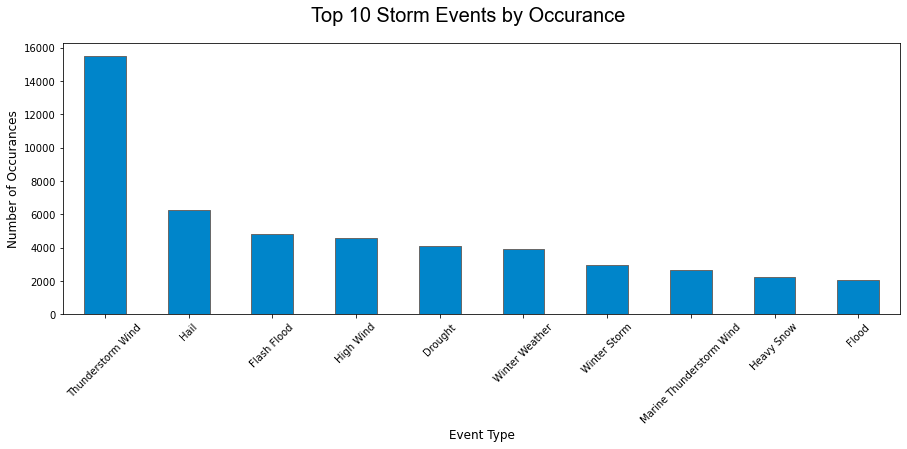

In [50]:
from matplotlib import pyplot as plt

top_10_event = details['event_type'].value_counts()[:10]
top_10_event.plot.bar(figsize = (15,5), color = '#0085CA', edgecolor = 'dimgrey')
plt.suptitle('Top 10 Storm Events by Occurance', fontsize = 20, fontname = 'Arial')

plt.xticks(rotation = 45)
plt.xlabel("Event Type", fontsize = 12)
plt.ylabel("Number of Occurances", fontsize = 12)

Top 15 Storm Events on map using `pyplot.express`.  <a name="allevents"></a> [Back](#alleventsback)

In [51]:
import plotly.express as px

top_15_event = details['event_type'].value_counts().head(15).reset_index()
array = top_15_event['index'].tolist()
top_15_event = details.loc[details['event_type'].isin(array)]

fig = px.scatter_geo(top_15_event, lat ='end_lat', lon ='end_lon', hover_name = 'end_location', color = 'event_type')

fig.update_layout(
        title = 'U.S Top 15 Storm Events<br>(Hover for city/town/village)', 
        geo_scope = 'usa', title_x = 0.5, title_font_family = 'Arial', title_font_color = 'black', title_font_size = 18,
        legend_font_family = 'Arial', legend_font_color = 'black', legend_font_size = 12, legend_itemsizing = 'constant',
        legend_title  = 'Event Type'
    )
fig.update_traces(marker = dict(size = 2.5))

fig.show()

Top 10 Storm Events by Monetary Damage using `pyplot`.

Text(0, 0.5, 'Damage ($)')

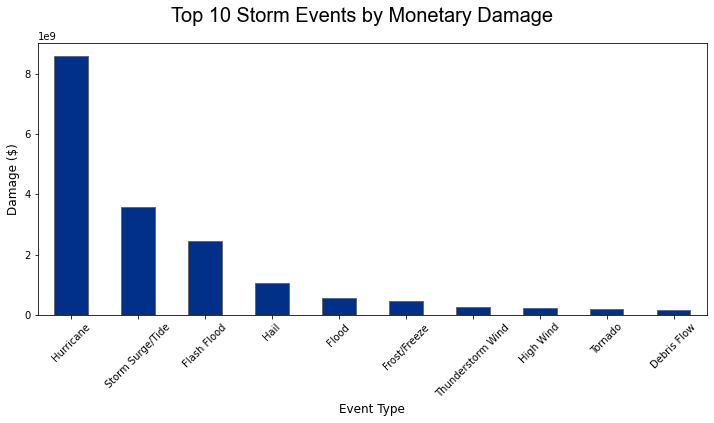

In [52]:
event_damage = details.groupby('event_type')['damage_total'].sum().sort_values(ascending = False).head(10)

event_damage.plot.bar(figsize = (12, 5), color = '#003087', edgecolor = 'dimgrey')
plt.suptitle('Top 10 Storm Events by Monetary Damage', fontsize = 20, fontname = 'Arial')   
    
plt.xticks(rotation = 45)
plt.xlabel("Event Type", fontsize = 12)
plt.ylabel("Damage ($)", fontsize = 12)

Tornado Count on Calendar Heatmap using `calplot`.

(<Figure size 1080x288 with 1 Axes>, array([<AxesSubplot:>], dtype=object))

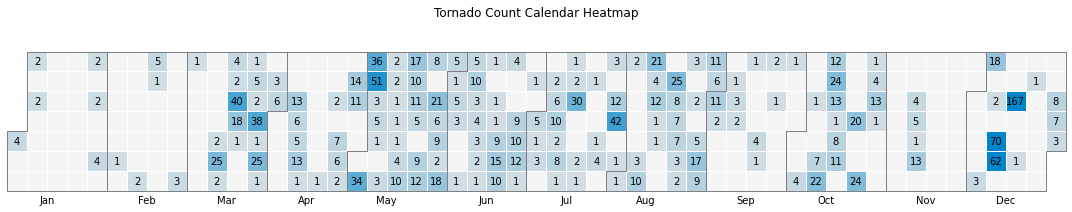

In [53]:
import calplot
import matplotlib

tornado_details['end_datetime'] = pd.to_datetime(tornado_details['end_date'])

events = pd.Series(tornado_details['end_datetime'].value_counts())

custom_color = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#d1dde3','#0085CA'])

calplot.calplot(events, cmap = custom_color, colorbar = False, textformat = '{:.0f}', 
                daylabels=[], figsize = (15,4), vmax = 60, suptitle='Tornado Count Calendar Heatmap', 
                yearlabels=False, suptitle_kws = {'x': 0.5, 'y': 0.9})

Total Monetary Damage by EF Rating (excluding "Unknown") using `pyplot`. <a name="efdam"></a> [Back](#efdamback)

Text(0, 0.5, 'Damage ($)')

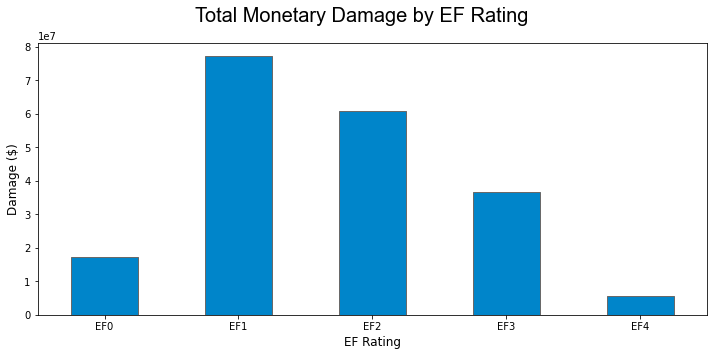

In [54]:
EF_damage = tornado_details[tornado_details['tor_f_scale'].str.contains('Unknown') == False]
EF_damage = EF_damage.groupby('tor_f_scale')['damage_total'].sum().sort_values(ascending = False).sort_index()

EF_damage.plot.bar(figsize = (12,5), color = '#0085CA', edgecolor = 'dimgrey')
plt.suptitle('Total Monetary Damage by EF Rating', fontsize = 20, fontname = 'Arial')

plt.xticks(rotation = 0)
plt.xlabel('EF Rating', fontsize = 12)
plt.ylabel('Damage ($)', fontsize = 12)

Tornado Storm Events (excluding "Unknown") on map using `pyplot.express`.

In [55]:
locations_tor = pd.merge(tornado_details, locations, on = 'event_id', how = 'inner').sort_values(by = 'tor_f_scale')
locations_tor = locations_tor[locations_tor['tor_f_scale'].str.contains('Unknown') == False]

fig = px.scatter_geo(locations_tor, lat='end_lat', lon='end_lon', hover_name= 'location', color = 'tor_f_scale')

fig.update_layout(
        title = 'U.S. Tornado Storm Events<br>(Hover for city/town/village)', 
        geo_scope = 'usa', title_x = 0.5, title_font_family = 'Arial', title_font_color = 'black', title_font_size = 18,
        legend_font_family = 'Arial', legend_font_color = 'black', legend_font_size = 12, legend_itemsizing = 'constant',
        legend_title  = 'Event Type'
    )
fig.update_traces(marker = dict(size = 5))

fig.show()

Top 10 Storm Events by Count of Fatalities using `pyplot`. <a name="eventfat"></a> [Back](#eventfatback)

Text(0, 0.5, 'Count of Fatalities')

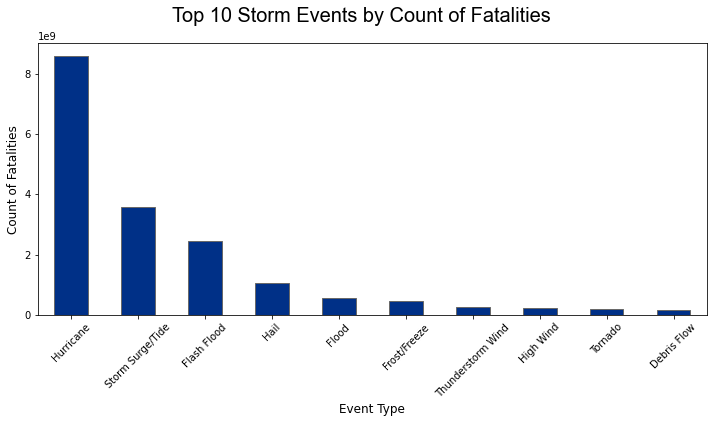

In [56]:
event_fatality = fatalities.groupby('event_type')['event_id'].count().sort_values(ascending = False).head(10)

event_damage.plot.bar(figsize = (12, 5), color = '#003087', edgecolor = 'dimgrey')
plt.suptitle('Top 10 Storm Events by Count of Fatalities', fontsize = 20, fontname = 'Arial') 

plt.xticks(rotation = 45)
plt.xlabel("Event Type", fontsize = 12)
plt.ylabel("Count of Fatalities", fontsize = 12)

Top 15 Fatality Event Types by Age Category using `pyplot`. <a name="agefat"></a> [Back](#agefatback)

Text(0, 0.5, 'Count of Fatalities')

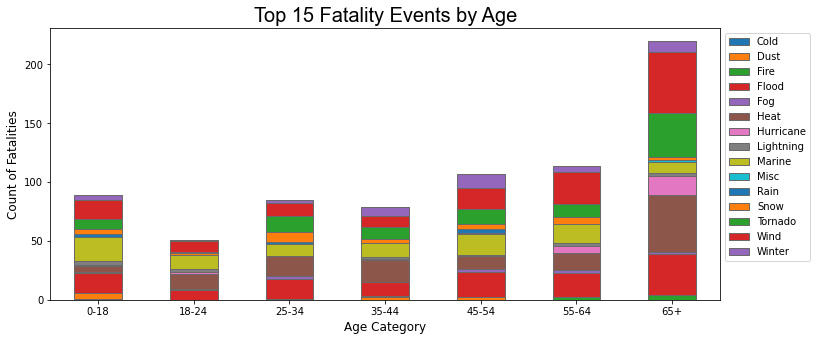

In [57]:
age_cross_tab = pd.crosstab(index=fatalities['age_category'],
                        columns=fatalities['event_category'])

ax = age_cross_tab.plot.bar(stacked = True, figsize = (12, 5), edgecolor = 'dimgrey')

ax.set_title('Top 15 Fatality Events by Age', fontsize = 20, fontname = 'Arial')
ax.legend(loc = 'best', bbox_to_anchor = (1.0, 1.0))

plt.xticks(rotation = 0)
plt.xlabel('Age Category', fontsize = 12)
plt.ylabel('Count of Fatalities', fontsize = 12)